In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing import image

In [4]:
train_datagen = image.ImageDataGenerator(
    rescale=1/255, horizontal_flip=True, zoom_range=0.2, shear_range=0.2
)
train_data = train_datagen.flow_from_directory(directory="/content/drive/MyDrive/CovidDataset/Train"
, target_size=(256,256), batch_size=16, class_mode='binary')

Found 224 images belonging to 2 classes.


In [5]:
train_data.class_indices

{'Covid': 0, 'Normal': 1}

In [9]:
test_datagen = image.ImageDataGenerator(
    rescale=1/255
)
test_data = test_datagen.flow_from_directory(directory="/content/drive/MyDrive/CovidDataset/Train"
, target_size=(256,256), batch_size=16, class_mode='binary')

Found 224 images belonging to 2 classes.


CNN Model

In [13]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', 
                 input_shape=(256, 256, 3)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.50))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer="adam",
              metrics=['acc'])

In [14]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 252, 252, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 126, 126, 64)      0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 124, 124, 64)      36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 62, 62, 64)       

In [16]:
model_history=model.fit_generator(train_data, steps_per_epoch=8, epochs=10, 
                    validation_steps=2, validation_data=test_data)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
8/8 [==============================] - 6s 811ms/step - loss: 0.3930 - acc: 0.9219 - val_loss: 0.2947 - val_acc: 0.9688
Epoch 2/10
8/8 [==============================] - 6s 730ms/step - loss: 0.2813 - acc: 0.8984 - val_loss: 0.1274 - val_acc: 0.9688
Epoch 3/10
8/8 [==============================] - 6s 753ms/step - loss: 0.1314 - acc: 0.9531 - val_loss: 0.1896 - val_acc: 0.9375
Epoch 4/10
8/8 [==============================] - 6s 733ms/step - loss: 0.0633 - acc: 0.9688 - val_loss: 0.0701 - val_acc: 0.9375
Epoch 5/10
8/8 [==============================] - 6s 772ms/step - loss: 0.1699 - acc: 0.9219 - val_loss: 0.0149 - val_acc: 1.0000
Epoch 6/10
8/8 [==============================] - 6s 765ms/step - loss: 0.1443 - acc: 0.9531 - val_loss: 0.2220 - val_acc: 0.8438
Epoch 7/10
8/8 [==============================] - 6s 759ms/step - loss: 0.1919 - acc: 0.9219 - val_loss: 0.0534 - val_acc: 1.0000
Epoch 8/10
8/8 [==============================] - 6s 759ms/step - loss: 0.1336 - acc: 0.95

In [22]:
model.metrics_names

['loss', 'acc']

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


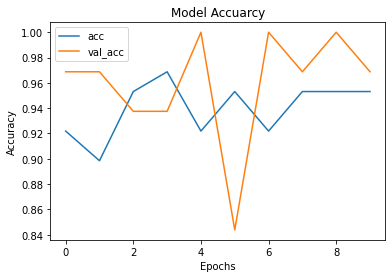

In [23]:
print(model_history.history.keys())
plt.plot(model_history.history['acc'],label='acc')
plt.plot(model_history.history['val_acc'],label='val_acc')
plt.title('Model Accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

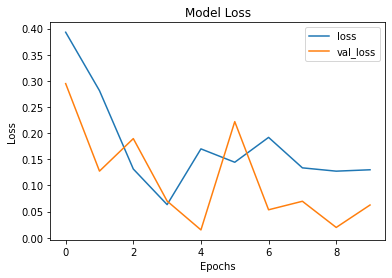

In [25]:
plt.plot(model_history.history['loss'],label='loss')
plt.plot(model_history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
model.evaluate_generator(train_data)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.10738897323608398, 0.9598214030265808]

In [27]:
model.evaluate_generator(test_data)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.06345118582248688, 0.9776785969734192]

Confusion Matrix

In [29]:
import os
y_actual, y_test=[],[]

In [32]:
for i in os.listdir("/content/drive/MyDrive/CovidDataset/Val/Normal/"):
  img=image.load_img("/content/drive/MyDrive/CovidDataset/Val/Normal/"
  +i, target_size=(256,256))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  pred=model.predict_classes(img)
  y_test.append(pred[0,0])
  y_actual.append(1)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [33]:
for i in os.listdir("/content/drive/MyDrive/CovidDataset/Val/Covid/"):
  img=image.load_img("/content/drive/MyDrive/CovidDataset/Val/Covid/"
  +i, target_size=(256,256))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  pred=model.predict_classes(img)
  y_test.append(pred[0,0])
  y_actual.append(0)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [34]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [35]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_actual,y_test)
print(cm)
accuracy_score(y_actual,y_test)

[[30  0]
 [ 3 27]]


0.95

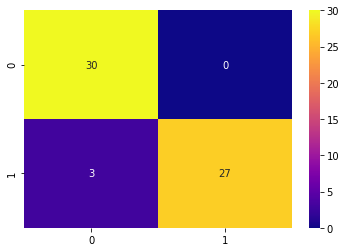

In [36]:
sns.heatmap(cm,cmap="plasma",annot=True)